<center><img src="images/title.png" width="100%"/></center>
<br>
<center><a href="http://bit.ly/pybay-keras">bit.ly/pybay-keras</a></center>

Who Am I?
-----

Brian Spiering

<center><img src="images/msds_logo.png" width="45%"/></center>

Professor at University of San Francisco in the MS in Data Science program

<center><img src="images/real_deep_learning.png" width="75%"/></center>

Keras - Neural Networks for humans
------

<center><img src="https://keras.io/img/keras-logo-small.jpg" width="45%"/></center>

A higher-level, more intuitive API for Deep Learning.

Like requests

Easy to define neural networks. Then automatically handles execution.

Like SQL

A simple and highly modular interface which allows focus on learning and enabling fast experimentation

Deep Learning 101
-----

<center><img src="images/neural_nets.jpg" width="75%"/></center>

Deep Learning (DL): Neural networks (NN) with >1 hidden layer
-------

<center><img src="http://www.kdnuggets.com/wp-content/uploads/neural-networks-layers.jpg" width="80%"/></center>

Neural networks are groups of nodes
------
<center><img src="http://3.bp.blogspot.com/-7RWgohC4pYE/VhtQ8IELsLI/AAAAAAAAA6I/_XFhMbjpcCY/s1600/Simple%2BNeural%2BNetwork.png" width="75%"/></center>

<center><img src="images/function_3.png" height="500"/></center>

<center><img src="http://1.bp.blogspot.com/-ZCOvJ9OYHLE/T8jXLkG81XI/AAAAAAAAAto/7LTHWLqOMyg/s1600/p1.png" height="500"/></center>

Deep Learning isn't magic, it is just very good at finding patterns.
------

<center><img src="images/features.png" width="80%"/></center>

Deep Learning has fewer steps than traditional Machine Learning
------

<center><img src="http://adilmoujahid.com/images/traditional-ml-deep-learning-2.png" width="1500"/></center>

<center><img src="images/twitter.png" width="75%"/></center>

If you want to follow along…
-----

[GitHub repo: bit.ly/pybay-keras](http://bit.ly/pybay-keras)

If you want to type along…
------
1. [Binder: In-Browser Jupyter Notebook](https://mybinder.org/v2/gh/brianspiering/keras-intro/master)
2. [Colaboratory: "Google Docs for Jupyter Notebooks"](https://colab.research.google.com/)

In [62]:
reset -fs

In [63]:
from keras import *

In [64]:
import keras

<center><img src="images/tf_logo.jpg" width="75%"/></center>

"An open-source software library for Machine Intelligence"

Numerical computation using data flow graphs. 

TensorFlow: A great backend
------

<center><img src="images/tf_features.png" width="75%"/></center>

A __very__ flexible architecture that allows you to do almost any operation.

Then deploy computation to CPUs (one or more), GPUs on desktop, cloud, or mobile device. 

MNIST handwritten digit database: <br> The “Hello World!” of Computer Vision
------

<center><img src="images/mnist-digits.png" width="80%"/></center>

<center><img src="https://www.tensorflow.org/versions/r0.10/images/MNIST-Matrix.png" width="800"/></center>

Each pixel is an input.

<center><img src="images/MNIST_neuralnet_image.png" width="80%"/></center>

In [65]:
# Import data
from keras.datasets import mnist

In [66]:
# Setup train and test splits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [67]:
from random import randint
from matplotlib import pyplot

%matplotlib inline

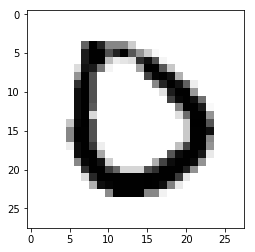

In [68]:
pyplot.imshow(x_train[randint(0, x_train.shape[0])], cmap='gray_r');

Munge data
-----

<center><img src="images/mnist_keras.png" width="75%"/></center>

Convert image matrix into vector to feed into first layer 

In [69]:
image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) # Transform from matrix to vector
x_train = x_train.astype('float32') # Cast as 32 bit integers
x_train /= 255 # Normalize inputs from 0-255 to 0.0-1.0

x_test = x_test.reshape(x_test.shape[0], image_size) # Transform from matrix to vector
x_test = x_test.astype('float32') # Cast as 32 bit integers
x_test /= 255 # Normalize inputs from 0-255 to 0.0-1.0

In [70]:
# Convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [71]:
from keras.models import Sequential


RTFM - https://keras.io/layers/

In [72]:
# Define model
model = Sequential()

In [73]:
from keras.layers import Dense

In [74]:
# Define input layer
layer_input = Dense(units=512, 
                    activation='sigmoid', 
                    input_shape=(image_size,))
model.add(layer_input)

In [75]:
# Define another layer
layer_input = Dense(units=512, 
                    activation='sigmoid')
model.add(layer_input)

In [76]:
# Define output layers
layer_output = Dense(units=num_classes,
                     activation='softmax')

model.add(layer_output)

In [77]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [78]:
from keras.optimizers import SGD

In [79]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [80]:
# Define training
history = model.fit(x_train, 
                    y_train,
                    epochs=5, # Number of passes over complete dataset
                    verbose=True, 
                    validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 28s 522us/step - loss: 2.1506 - acc: 0.3276 - val_loss: 1.8991 - val_acc: 0.5320
Epoch 2/5
54000/54000 [==============================] - 26s 480us/step - loss: 1.5085 - acc: 0.6534 - val_loss: 1.0865 - val_acc: 0.8048
Epoch 3/5
54000/54000 [==============================] - 25s 460us/step - loss: 0.9098 - acc: 0.7790 - val_loss: 0.6828 - val_acc: 0.8453
Epoch 4/5
54000/54000 [==============================] - 25s 458us/step - loss: 0.6599 - acc: 0.8283 - val_loss: 0.5166 - val_acc: 0.8785
Epoch 5/5
54000/54000 [==============================] - 32s 589us/step - loss: 0.5443 - acc: 0.8531 - val_loss: 0.4329 - val_acc: 0.8915


Now we wait...
------

<center><img src="images/waiting.jpg" width="75%"/></center>

In [82]:
# Let's see how good we did
loss, accuracy = model.evaluate(x_test, 
                               y_test, 
                               verbose=True)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3%}")

10000/10000 [==============================] - 1s 142us/step
Test loss: 0.482
Test accuracy: 86.810%


Other features of Keras
-----

- Common built-in functions (e.g., activation functions and optimitizers)
- Convolutional neural network (CNN, or ConvNet)
- Recurrent neural network (RNN) & Long-short term memory (LSTM)
- Pre-trained models

Summary
-----

- Keras designed for human beings, not computers.
- Simple to define complex neural networks.


<br>

Bonus Material
--------